In [2]:
import ibapi
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates
import datetime
import matplotlib.dates as mdates
from datetime import date
import threading
import time
import pandas

In [4]:


class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)
		self.data = [] #Initialize variable to store candle

	def historicalData(self, reqId, bar):
		self.data.append([bar.date, bar.open, bar.close, bar.volume])
		print(bar)
		
def run_loop():
	app.run()

app = IBapi()
app.connect('127.0.0.1', 7496, 123)

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
contract = Contract()
contract.symbol = 'SPY'
contract.secType = 'STK'
contract.exchange = 'SMART'
contract.currency = 'USD'

#Request historical candles
app.reqHistoricalData(1, contract, '', '6 M', '5 mins', 'TRADES', 1, 2, False, [])

time.sleep(45) #sleep to allow enough time for data to be returned

df = pandas.DataFrame(app.data, columns=['DateTime', 'Open', 'Close', 'Volume'])
df['DateTime'] = pandas.to_datetime(df['DateTime'],unit='s').dt.tz_localize(tz='UTC')
df['DateTime'] = df['DateTime'].dt.tz_convert(tz='US/Eastern')
df.to_csv('SpyHist.csv')  

print(df)


app.disconnect()

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:eufarmnj
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


In [5]:

df = pandas.read_csv('C:\\src\\stockPredictor\\SpyHist.csv').set_index('DateTime')
new_day_data = pandas.read_csv('C:\\src\\stockPredictor\\dailySpy.csv').set_index('DateTime')

In [6]:
dfAverage = pandas.DataFrame(columns=['Average','Time'])
currentAve = 0
count = len(df.date.unique())

for currentTime in df.time.unique():
    average = 0
    for currentDate in df.date.unique():
        if(df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)].empty is False):
            average = average + df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)]['Close'].values[0]-df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)]['Open'].values[0]
        else:
            print(currentDate)
    currentAve = currentAve + (average/count)
    dfAverage.loc[len(dfAverage.index)] = [currentAve,currentTime] 


2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03
2023-07-03


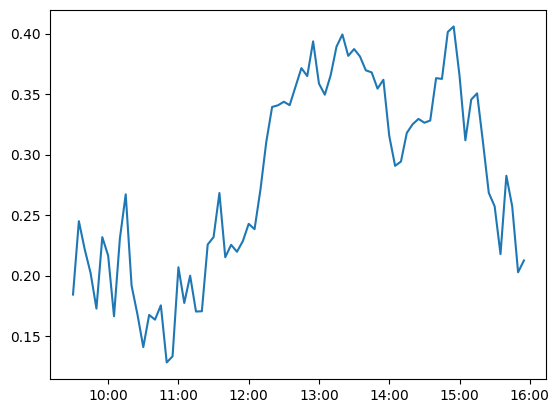

In [13]:
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in dfAverage["Time"]]
plt.plot(datetimes, dfAverage["Average"])
fmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(fmt)

In [4]:
class IBapi(EWrapper, EClient):
	def __init__(self):
		EClient.__init__(self, self)
		self.data = [] #Initialize variable to store candle

	def historicalData(self, reqId, bar):
		self.data.append([bar.date, bar.open, bar.close, bar.volume])
		
def run_loop():
	app.run()

app = IBapi()
app.connect('127.0.0.1', 7496, 124)

#Start the socket in a thread
api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

time.sleep(1) #Sleep interval to allow time for connection to server

#Create contract object
contract = Contract()
contract.symbol = 'SPY'
contract.secType = 'STK'
contract.exchange = 'SMART'
contract.currency = 'USD'

#Request historical candles
app.reqHistoricalData(1, contract, '', '1 D', '5 mins', 'TRADES', 1, 2, False, [])

time.sleep(10) #sleep to allow enough time for data to be returned

todaysData = pandas.DataFrame(app.data, columns=['DateTime', 'Open', 'Close', 'Volume'])
todaysData['DateTime'] = pandas.to_datetime(todaysData['DateTime'],unit='s').dt.tz_localize(tz='UTC')
todaysData['DateTime'] = todaysData['DateTime'].dt.tz_convert(tz='US/Eastern')
todaysData.to_csv('dailySpy.csv')  

print(todaysData)


app.disconnect()

ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:usopt
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefnj


                    DateTime    Open   Close   Volume
0  2023-09-22 09:30:00-04:00  432.46  432.14  1637352
1  2023-09-22 09:35:00-04:00  432.14  432.16  1134849
2  2023-09-22 09:40:00-04:00  432.16  431.97  1380107
3  2023-09-22 09:45:00-04:00  431.93  432.34  1119613
4  2023-09-22 09:50:00-04:00  432.34  431.84   936905
..                       ...     ...     ...      ...
73 2023-09-22 15:35:00-04:00  432.02  431.97   838136
74 2023-09-22 15:40:00-04:00  431.98  430.98  1722700
75 2023-09-22 15:45:00-04:00  430.98  430.65  3680855
76 2023-09-22 15:50:00-04:00  430.64  430.24  4129915
77 2023-09-22 15:55:00-04:00  430.23  430.38  7183263

[78 rows x 4 columns]


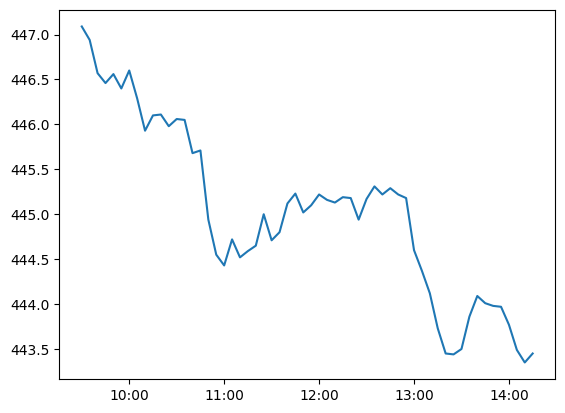

In [107]:
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in todaysData["time"]]
plt.plot(datetimes, todaysData["Close"])
fmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(fmt)

In [155]:
def getClosestGraph(currentData):
    lowestDifference = 0
    lowestDate = date.today()
    
    for currentDate in df.date.unique():
        difference = 0
        for currentTime in currentData.time.unique():
            if(df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)].empty is False):
                difference = difference + abs((currentData.loc[(currentData['time'] == currentTime)]['Close'].values[0] - currentData.loc[(currentData['time'] == currentTime)]['Open'].values[0]) - (df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)]['Close'].values[0] - df.loc[(df['time'] == currentTime) & (df['date'] == currentDate)]['Open'].values[0]))
            else:
                difference = 99999
                break
        if lowestDifference == 0:
            lowestDifference = difference
            lowestDate = currentDate
        else:
            if difference < lowestDifference:
                lowestDifference = difference
                lowestDate = currentDate
    print(lowestDifference)
    return df.loc[(df['date'] == lowestDate)]

-0.029999999999972715
0.45999999999997954
-0.23999999999995225
0.0
-0.07000000000005002
0.13999999999998636
-0.12000000000000455
0.5900000000000318
0.07999999999998408
0.4200000000000159
0.660000000000025
0.11000000000001364
0.5900000000000318
-0.060000000000002274
-0.6999999999999886
0.39999999999997726
0.0
0.14999999999997726
0.6100000000000136
-0.06999999999999318
-0.4200000000000159
0.03000000000002956
-0.1500000000000341
0.020000000000038654
-0.03000000000002956
-0.03999999999996362
0.12000000000000455
0.4700000000000273
0.1099999999999568
-0.8799999999999955
-0.12000000000000455
-0.37000000000000455
-0.5
0.2400000000000091
0.10000000000002274
-0.2699999999999818
0.12999999999999545
-0.20999999999997954
0.2400000000000091
-0.06999999999999318
-0.020000000000038654
-0.009999999999990905
0.13999999999998636
0.14999999999997726
-0.18999999999999773
0.4300000000000068
0.22000000000002728
-0.8300000000000409
0.410000000000025
-0.3100000000000023
-0.2899999999999636
0.13999999999998636


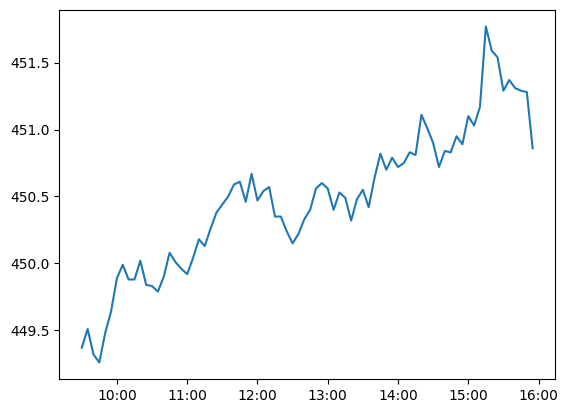

In [156]:
closestGraph = getClosestGraph(todaysData)
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in closestGraph["time"]]
plt.plot(datetimes, closestGraph["Close"])
fmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(fmt)

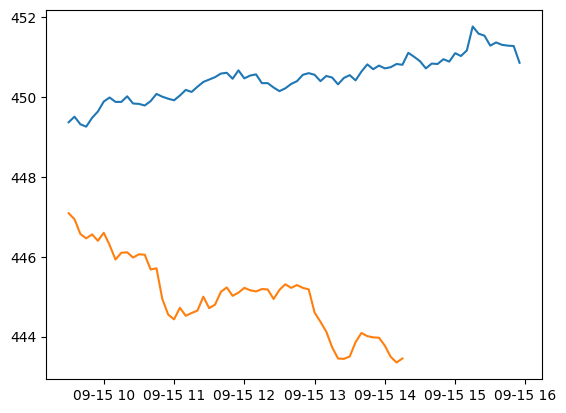

In [138]:
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in closestGraph["time"]]
plt.plot(datetimes, closestGraph["Close"], label = "curve 1")
datetimes2 = [datetime.datetime.combine(datetime.date.today(), t) for t in todaysData["time"]]
plt.plot(datetimes2, todaysData["Close"], label = "curve 2")
plt.show()

In [150]:
todaysData['Difference'] = todaysData['Close'] - todaysData['Open']
closestGraph['Difference'] = closestGraph['Close'] - closestGraph['Open']

C:\Users\tmcna\AppData\Local\Temp\ipykernel_26532\2536520111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closestGraph['Difference'] = closestGraph['Close'] - closestGraph['Open']


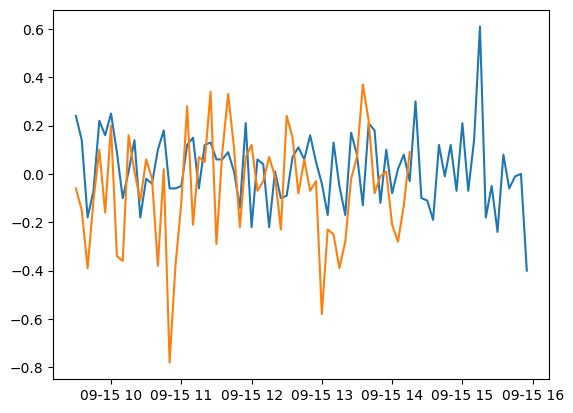

ERROR -1 2103 Market data farm connection is broken:cashfarm
ERROR -1 2103 Market data farm connection is broken:cashfarm
ERROR -1 2103 Market data farm connection is broken:cashfarm
ERROR -1 2103 Market data farm connection is broken:cashfarm


In [151]:
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in closestGraph["time"]]
plt.plot(datetimes, closestGraph["Difference"], label = "curve 1")
datetimes2 = [datetime.datetime.combine(datetime.date.today(), t) for t in todaysData["time"]]
plt.plot(datetimes2, todaysData["Difference"], label = "curve 2")
plt.show()

In [163]:
closestGraph

,DateTime,Open,Close,date,time,Difference
3006,2023-07-17 09:30:00-04:00,449.13,449.37,2023-07-17,09:30:00,0.24
3007,2023-07-17 09:35:00-04:00,449.37,449.51,2023-07-17,09:35:00,0.14
3008,2023-07-17 09:40:00-04:00,449.50,449.32,2023-07-17,09:40:00,-0.18
3009,2023-07-17 09:45:00-04:00,449.33,449.26,2023-07-17,09:45:00,-0.07
3010,2023-07-17 09:50:00-04:00,449.26,449.48,2023-07-17,09:50:00,0.22
...,...,...,...,...,...,...
3079,2023-07-17 15:35:00-04:00,451.29,451.37,2023-07-17,15:35:00,0.08
3080,2023-07-17 15:40:00-04:00,451.37,451.31,2023-07-17,15:40:00,-0.06
3081,2023-07-17 15:45:00-04:00,451.30,451.29,2023-07-17,15:45:00,-0.01
3082,2023-07-17 15:50:00-04:00,451.28,451.28,2023-07-17,15:50:00,0.00


In [170]:
todaysData

,DateTime,Open,Close,date,time,Difference
0,2023-09-15 09:30:00-04:00,447.15,447.09,2023-09-15,09:30:00,-0.06
1,2023-09-15 09:35:00-04:00,447.09,446.94,2023-09-15,09:35:00,-0.15
2,2023-09-15 09:40:00-04:00,446.96,446.57,2023-09-15,09:40:00,-0.39
3,2023-09-15 09:45:00-04:00,446.57,446.46,2023-09-15,09:45:00,-0.11
4,2023-09-15 09:50:00-04:00,446.46,446.56,2023-09-15,09:50:00,0.10
5,2023-09-15 09:55:00-04:00,446.56,446.40,2023-09-15,09:55:00,-0.16
6,2023-09-15 10:00:00-04:00,446.40,446.60,2023-09-15,10:00:00,0.20
7,2023-09-15 10:05:00-04:00,446.63,446.29,2023-09-15,10:05:00,-0.34
8,2023-09-15 10:10:00-04:00,446.29,445.93,2023-09-15,10:10:00,-0.36
9,2023-09-15 10:15:00-04:00,445.94,446.10,2023-09-15,10:15:00,0.16


In [172]:

for currentDate in closestGraph.date.unique():
    difference = 0
    for currentTime in todaysData.time.unique():
        print(abs(((todaysData.loc[(todaysData['time'] == currentTime)]['Close'].values[0] - todaysData.loc[(todaysData['time'] == currentTime)]['Open'].values[0]) - (closestGraph.loc[(closestGraph['time'] == currentTime) & (closestGraph['date'] == currentDate)]['Close'].values[0] - closestGraph.loc[(closestGraph['time'] == currentTime) & (closestGraph['date'] == currentDate)]['Open'].values[0]))))


0.30000000000001137
0.2899999999999636
0.20999999999997954
0.040000000000020464
0.12000000000000455
0.3199999999999932
0.049999999999954525
0.4300000000000068
0.2599999999999909
0.1500000000000341
0.12999999999999545
0.07000000000005002
0.08000000000004093
0.01999999999998181
0.47999999999996135
0.160000000000025
0.7200000000000273
0.3199999999999932
0.06999999999999318
0.160000000000025
0.3600000000000705
0.12999999999999545
0.07000000000005002
0.20999999999997954
0.35000000000002274
0.03000000000002956
0.2400000000000091
0.10000000000002274
0.07999999999998408
0.13999999999998636
0.339999999999975
0.12999999999999545
0.07000000000005002
0.2899999999999636
0.020000000000038654
0.1300000000000523
0.3300000000000409
0.07999999999992724
0.18999999999994088
0.0
0.2300000000000182
0.07999999999998408
0.5399999999999636
0.060000000000002274
0.37999999999999545
0.339999999999975
0.11000000000001364
0.18999999999999773
0.009999999999990905
0.5
0.009999999999990905
0.2599999999999909
0.1100000